In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


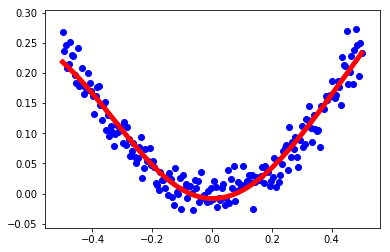

In [14]:
# linspace 是均匀分布 200个名在-0,5和 0.5之间
# [:, np.newaxis] 把数据 竖过来
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
# 一个随机数据， 和x_data的 结构一样
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise




# 输入
x = tf.placeholder(tf.float32,[None, 1])
y = tf.placeholder(tf.float32,[None, 1])

#中间层
# 【1，10】    1因为输入层是1个， 中间层是10个神经元，所以是 10
weights_l1 = tf.Variable(tf.random_normal([1,10]))
#加权值就是一个， 而且中间层为10个神经元 ， 所以[1,10]
biases_l1 = tf.Variable(tf.zeros([1,10]))
wx_plus_b_l1 = tf.matmul(x, weights_l1) + biases_l1
l1 = tf.nn.tanh(wx_plus_b_l1)

#输出层
# 这个的输入是10个神经元， 输出是一个， 所以是 [10,1]
weights_l2 = tf.Variable(tf.random_normal([10, 1]))
#加权值就是一个， 而且输出为一个神经元， 所以这里是 [1,1]
biases_l2 = tf.Variable(tf.zeros([1,1]))
wx_plus_b_l2 = tf.matmul(l1, weights_l2) + biases_l2
prediction = tf.nn.tanh(wx_plus_b_l2)


loss = tf.reduce_mean(tf.square(y - prediction))

# train_step = tf.train.GradientDescentOptimizer(0.1).minmize(loss)


optimizer = tf.train.GradientDescentOptimizer(0.1)

train_step = optimizer.minimize(loss)


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step, feed_dict={x:x_data, y: y_data})
       
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
    
#     print(x_data)   
#     print(noise) 
#     print(y_data) 
    plt.figure()
#     plt.scatter(x_data, x_data, c='g')
#     plt.scatter(x_data, noise, c='r')
    plt.scatter(x_data, y_data, c='b')
    plt.plot(x_data, prediction_value, 'r-',lw=5)
    plt.show()